### <center>Jayantilal Bhanushali </center>
- Email: jay4datascience@gmail.com
- Phone: +91 90164 70387
- LinkedIn: https://www.linkedin.com/in/jayantilalb


### Section B:
#### Given a pool of data of mobile device information that these users are using ie. Brand, model, design a model to determine the eligibility of individuals for obtaining a loan using device data. Take into account that not all device attributes are readily available all the time and there is no historical data available.


__Index:__

0. **[Initial Understanding of the Problem Statement](#understanding)**
1. **[Importing & Preparing Data](#import_data)**
2. **[Exploratory Data Analysis](#eda)**
3. **[Conclusion](#conclusion)**
4. **[Way Forward](#way_forward)**

<a id='understanding'></a>
__My Understanding of the Problem Statement:__
- In many cases, traditional creditworthiness data sources—such as FICO, Experian, or TransUnion scores—are either unavailable or insufficient. This gap creates significant challenges for lenders, leading to both missed opportunities for customers who might otherwise qualify for loans and revenue losses for lending institutions.
- In ML, this can be considered as a `Cold-Start Problem`, where the absence of historical or direct data makes it difficult to make accurate predictions. Despite this limitation, actionable insights can still be derived by leveraging alternative or proxy data sources to make informed lending decisions with reasonable confidence.
- One promising approach is to utilize mobile device attributes (e.g., brand, model, price range, device age) as a proxy for an individual’s economic status. Mobile devices, often reflective of purchasing power and financial habits, offer a unique data-driven pathway to infer affordability and potential creditworthiness. 
- By intelligently analyzing these attributes, lenders can bridge the information gap, enable smarter risk assessments, and unlock lending opportunities for previously underserved or overlooked customer segments.

__Use of Public Dataset:__
- There was no direct open source dataset available for Mobile Behavious and Loan eligibility, hence we are using a dataset that has mobile usage behaviour.  
- We are using the dataset'' since it was the only dataset that had combination of mobile usage behaviour along with App usage behaviour that I believe is important to understand the consumer psychology.
- Mobile Usage Behaviour Dataset: https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset
- Mobile Price Dataset: https://www.kaggle.com/datasets/rkiattisak/mobile-phone-price

__Approach:__
- The 'Mobile Behavior Dataset' lacks critical technical specifications and pricing details that are essential for accurately inferring a user's economic status. These attributes—such as device price, release year, and technical specifications—serve as strong proxies for understanding purchasing power and financial capability. To bridge this gap, we must leverage external data sources that provide reliable and granular insights into mobile device details.

- In a production environment, the ideal approach would involve real-time integration with an API service (either from an external provider like GSMA Intelligence, Statista, or an internal device database). This API would dynamically fetch key device details, including:
    - Current Market Price
    - Original Launch Price
    - Device Age (Release Date)
    - Market Share and Popularity
    - Device Tier (Flagship, Mid-range, Entry-level)
    - Such integration would enable real-time, precise insights, ensuring the lending model remains both responsive and accurate in assessing loan eligibility.

- In scenarios where price information is unavailable or inconsistent, an in-house Machine Learning model can be developed to predict the price of a device. This model would rely on technical specifications such as:
    - Brand Name
    - RAM and Storage Capacity
    - Battery Type and Size
    - Processor Details
    - Connectivity Options (Bluetooth, Wi-Fi, 5G Support)
    - By using a sufficiently large and diverse training dataset, this predictive model could estimate device prices with reasonable accuracy, ensuring minimal disruption to the loan assessment pipeline.

- For this assessment purpose, I have utilized an open-source 'Mobile Prices Dataset' from Kaggle as a proxy for external data. While this dataset is not perfect and may have certain limitations, it serves as an appropriate stand-in to demonstrate the methodology. In real-world projects, datasets are rarely flawless, and adaptability in handling data imperfections is key to building robust solutions.

<a id= 'import_data'></a>
## 1: Importing, Preparing & Merging Datasets

In [1]:
import numpy as np 
import pandas as pd 
import os

In [ ]:
# Dataset 1 - Mobile behaviour dataset
df_mobile_behaviour = pd.read_csv(r'C:\Users\Jayanti\Downloads\SHIELD - Assessment\Dataset - 2\user_behavior_dataset.csv')
df_mobile_behaviour

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


In [13]:
df_mobile_behaviour['Device Model'].value_counts()

Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: Device Model, dtype: int64

In [23]:
# Cleaning the Device Model column
df_mobile_behaviour['Device Model'] = df_mobile_behaviour['Device Model'].replace('iPhone 12', 'Apple iPhone 12')
df_mobile_behaviour['Device Model'].value_counts()

Xiaomi Mi 11          146
Apple iPhone 12       146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: Device Model, dtype: int64

In [26]:
# Split Device Model into Brand and Model
df_mobile_behaviour['Brand'] = df_mobile_behaviour['Device Model'].apply(lambda x: x.split()[0])
df_mobile_behaviour['Model'] = df_mobile_behaviour['Device Model'].apply(lambda x: ' '.join(x.split()[1:]))

df_mobile_behaviour.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,Brand,Model
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4,Google,Pixel 5
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3,OnePlus,9
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2,Xiaomi,Mi 11
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3,Google,Pixel 5
4,5,Apple iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3,Apple,iPhone 12


In [24]:
# Dataset 2 - Mobile Price dataset
df_mobile_price = pd.read_csv(r'C:\Users\Jayanti\Downloads\SHIELD - Assessment\Dataset - 2\Mobile phone price.csv')
df_mobile_price

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799
...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,6.7,12+64+12,4300,1049
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349
404,Apple,iPhone 12 Pro Max,128,6,6.7,12+12+12,3687,1099
405,Oppo,Reno3,128,8,6.4,48+13+8+2,4025,429


In [25]:
df_mobile_price['Model'].value_counts()

Poco X3 Pro           6
Y33s                  5
iPhone XR             5
C21Y                  5
Redmi 10 Prime        5
                     ..
Mi 11 Lite NE         1
Moto G Stylus 2021    1
A54s 5G               1
Galaxy M52            1
Reno3                 1
Name: Model, Length: 239, dtype: int64

In [21]:
unique_brand_model = df_mobile_price[['Brand', 'Model']].drop_duplicates()
print(unique_brand_model)

        Brand              Model
0       Apple      iPhone 13 Pro
1     Samsung   Galaxy S21 Ultra
2     OnePlus              9 Pro
3      Xiaomi  Redmi Note 10 Pro
4      Google            Pixel 6
..        ...                ...
400  Motorola         Moto G Pro
401    Huawei           P30 Lite
403    Xiaomi      Mi 10 Lite 5G
404     Apple  iPhone 12 Pro Max
405      Oppo              Reno3

[239 rows x 2 columns]


In [32]:
# Merge the datasets on Brand and Model
df_mobile_behaviour_price = pd.merge(df_mobile_behaviour, df_mobile_price, how='left', left_on=['Brand', 'Model'], right_on=['Brand', 'Model'])

# Display the merged dataframe
df_mobile_behaviour_price.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4,Google,Pixel 5,128,8,6,12.2+16,4080,699
1,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4,Google,Pixel 5,128,8,6,12.2+16,4080,699
2,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4,Google,Pixel 5,128,8,6,12.2+16,4080,699
3,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3,OnePlus,9,128 GB,8 GB,6.55,48 + 50 + 2,4500,729
4,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3,OnePlus,9,128,8,6.55,48+50+2,4500,729


In [33]:
# Check for null values in the Price column
null_price = df_mobile_behaviour_price[df_mobile_behaviour_price['Price ($)'].isnull()][['Brand', 'Model']].drop_duplicates()

# Display the Brand and Model values with null Price
print(null_price)

Empty DataFrame
Columns: [Brand, Model]
Index: []


In [40]:
# Print all column names
df_mobile_behaviour_price.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class', 'Brand',
       'Model', 'Storage ', 'RAM ', 'Screen Size (inches)', 'Camera (MP)',
       'Battery Capacity (mAh)', 'Price ($)'],
      dtype='object')

In [42]:
# Clean column names
df_mobile_behaviour_price.columns = df_mobile_behaviour_price.columns.str.strip()
df_mobile_behaviour_price.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class', 'Brand',
       'Model', 'Storage', 'RAM', 'Screen Size (inches)', 'Camera (MP)',
       'Battery Capacity (mAh)', 'Price ($)'],
      dtype='object')

In [38]:
df_mobile_behaviour_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1383 entries, 0 to 1382
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     1383 non-null   int64  
 1   Device Model                1383 non-null   object 
 2   Operating System            1383 non-null   object 
 3   App Usage Time (min/day)    1383 non-null   int64  
 4   Screen On Time (hours/day)  1383 non-null   float64
 5   Battery Drain (mAh/day)     1383 non-null   int64  
 6   Number of Apps Installed    1383 non-null   int64  
 7   Data Usage (MB/day)         1383 non-null   int64  
 8   Age                         1383 non-null   int64  
 9   Gender                      1383 non-null   object 
 10  User Behavior Class         1383 non-null   int64  
 11  Brand                       1383 non-null   object 
 12  Model                       1383 non-null   object 
 13  Storage                     1383 

In [43]:
# Remove non-numeric characters and convert to appropriate data types
df_mobile_behaviour_price['Storage'] = df_mobile_behaviour_price['Storage'].str.replace('GB', '').astype(int)
df_mobile_behaviour_price['RAM'] = df_mobile_behaviour_price['RAM'].str.replace('GB', '').astype(int)
df_mobile_behaviour_price['Screen Size (inches)'] = df_mobile_behaviour_price['Screen Size (inches)'].astype(float)
df_mobile_behaviour_price['Battery Capacity (mAh)'] = df_mobile_behaviour_price['Battery Capacity (mAh)'].astype(int)
df_mobile_behaviour_price['Price ($)'] = df_mobile_behaviour_price['Price ($)'].str.replace('$', '').astype(float)

# Display the updated dataframe info to verify changes
df_mobile_behaviour_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1383 entries, 0 to 1382
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     1383 non-null   int64  
 1   Device Model                1383 non-null   object 
 2   Operating System            1383 non-null   object 
 3   App Usage Time (min/day)    1383 non-null   int64  
 4   Screen On Time (hours/day)  1383 non-null   float64
 5   Battery Drain (mAh/day)     1383 non-null   int64  
 6   Number of Apps Installed    1383 non-null   int64  
 7   Data Usage (MB/day)         1383 non-null   int64  
 8   Age                         1383 non-null   int64  
 9   Gender                      1383 non-null   object 
 10  User Behavior Class         1383 non-null   int64  
 11  Brand                       1383 non-null   object 
 12  Model                       1383 non-null   object 
 13  Storage                     1383 

c:\Users\Jayanti\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


<a id='eda'></a>
## 2: Exploratory Data Analysis

In [44]:
# Dimensions of the dataset
print("Shape of data:", df_mobile_behaviour_price.shape)

Shape of data: (1383, 19)


In [53]:
# summary statistics
df_mobile_behaviour_price.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class,Storage,RAM,Screen Size (inches),Battery Capacity (mAh),Price ($)
count,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.00000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000
mean,353.109183,269.465654,5.238033,1510.911786,50.477946,921.782357,38.49530,2.971077,141.512654,7.577730,6.259552,4059.052784,749.455531
std,204.189763,177.715781,3.073697,817.746021,26.903901,639.368951,12.04423,1.403645,39.346503,1.229578,0.269677,482.681554,42.816989
min,1.000000,30.000000,1.000000,302.000000,10.000000,102.000000,18.00000,1.000000,128.000000,4.000000,6.000000,2815.000000,699.000000
25%,173.000000,105.500000,2.500000,690.000000,26.000000,372.000000,28.00000,2.000000,128.000000,8.000000,6.000000,4000.000000,699.000000
50%,354.000000,227.000000,4.800000,1489.000000,49.000000,822.000000,38.00000,3.000000,128.000000,8.000000,6.200000,4080.000000,729.000000
75%,533.500000,435.500000,7.300000,2203.000000,74.000000,1337.000000,50.00000,4.000000,128.000000,8.000000,6.550000,4500.000000,799.000000
max,700.000000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.00000,5.000000,256.000000,8.000000,6.810000,4600.000000,799.000000


In [46]:
# check for null/ missing values
df_mobile_behaviour_price.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
Brand                         0
Model                         0
Storage                       0
RAM                           0
Screen Size (inches)          0
Camera (MP)                   0
Battery Capacity (mAh)        0
Price ($)                     0
dtype: int64

In [65]:
# Define price classes as proxy to income class
def price_class(price):
    if price < 300:
        return 'Low'
    elif 300 <= price < 700:
        return 'Medium'
    else:
        return 'High'

# Apply the function to create a new column 'Price Class'
df_mobile_behaviour_price['Price Class'] = df_mobile_behaviour_price['Price ($)'].apply(price_class)

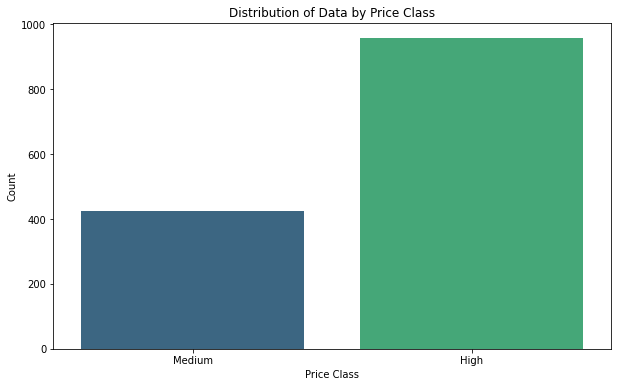

In [66]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Price Class', data=df_mobile_behaviour_price, palette='viridis')
plt.title('Distribution of Data by Price Class')
plt.xlabel('Price Class')
plt.ylabel('Count')
plt.show()

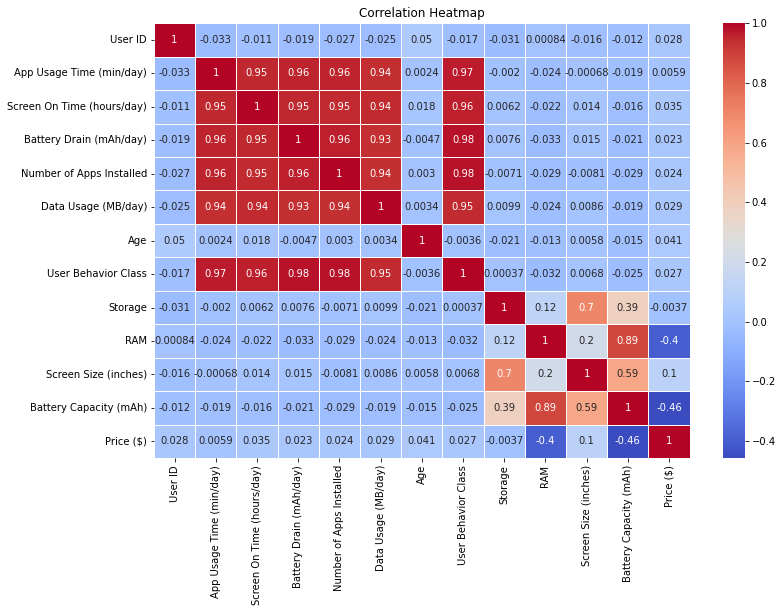

In [67]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_mobile_behaviour_price.corr()

# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

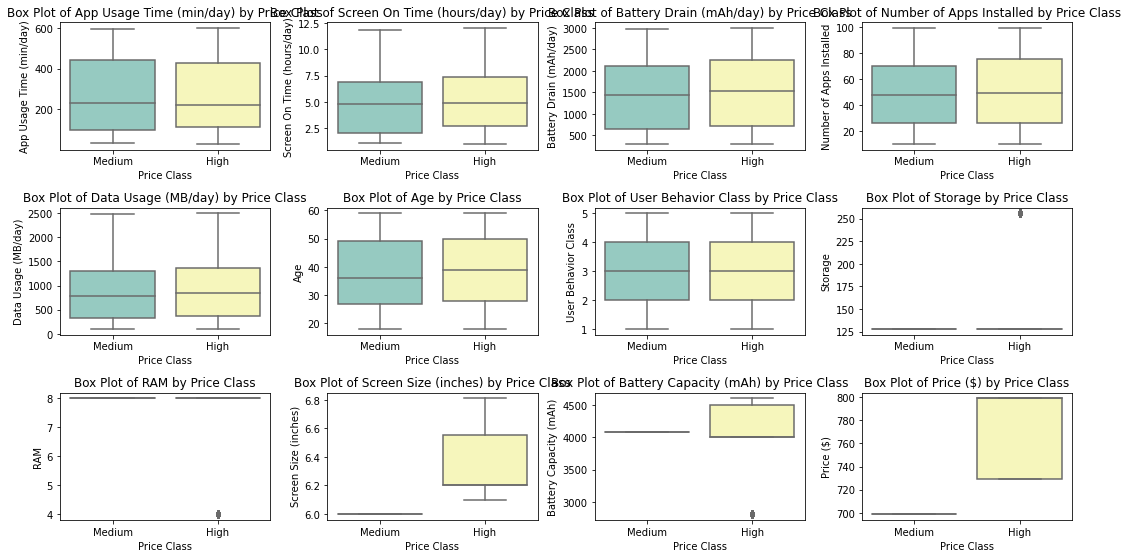

In [71]:
# List of numeric features
numeric_features = df_mobile_behaviour_price.select_dtypes(include=[np.number]).columns.tolist()

# Remove 'User ID' from the list of numeric features
numeric_features.remove('User ID')

# Create box plots for each numeric feature by Price Class
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x='Price Class', y=feature, data=df_mobile_behaviour_price, palette='Set3')
    plt.title(f'Box Plot of {feature} by Price Class')
    plt.xlabel('Price Class')
    plt.ylabel(feature)
    plt.tight_layout()

plt.show()

<a id='conclusion'> </a>
## 3: Conclusion:
- The data we got was very limited and skewed with just 5 unique devices. Hence, the difference between price of mobile and usage behaviour is not distinctly visible.
- However, this is something that can be effectively tested given enough number of data points available. 

<a id='way_forward'></a>
## 4: Way Forward:
- Since we do not have historical data, we need to start with designing 'Hypothesis' and using the collected information (or external datasets) to perform 'Hypothesis Testing'.
- With the objective of using Mobile Device Attributes to determine Loan Eligibility, some of the Hypothesis can be:
    1. Higher-priced mobile devices are positively correlated with higher loan eligibility ?
    2. Users with newer devices indicate better financial capacity compared to users with older devices.
    3. Users of premium brands (e.g., Apple, Samsung) are more likely to have higher loan eligibility than users of budget brands (e.g., Oppo, Vivo, Mi)
    4. Users with high productivity and finance app usage are more likely to have better financial management and higher loan eligibility
    5. Users owning devices with high market share tend to have more predictable financial behaviors, increasing loan eligibility.
- Hypothesis which is only possible if we have permissions to read their contacts data:

    6. If contacts have good credit worthiness scores, there is a high chance that the user will also replicate similar behaviour. 
